In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import arap_helpers
from arap_helpers import QueryTable, AlternateProducts, get_prod_catalog, get_subcategory 

project_id = "cp-gaa-visualization-dev"

### Alternate Products: Electric (Battery-Powered) Toothbrush

In [3]:
sql_query = """
SELECT
  start_date,
  asin,
  product_title,
  n1_purchased_asin,
  n1_purchased_product_title,
  n1_purchased_percent,
  n2_purchased_asin,
  n2_purchased_product_title,
  n2_purchased_percent,
  n3_purchased_asin,
  n3_purchased_product_title,
  n3_purchased_percent
FROM 
  `cp-gaa-visualization-dev.arap.alternate_purchase_wly` 
WHERE 
  country = 'USA'
  AND asin IN ('B007K6LDC6','B07DNFH4CG','B01547I5LE','B0787PBJ4W','B07815DPW1','B07GX6WL4H','B07GX3RPL7','B073QVHXB5','B01GHE0WE6','B002DGCRNC',
  'B01N28GZXX','B06VXPYL34','B07Q61VZKY','B00HXAIJLM','B079FZBL69','B07DNFB7WN','B0746NTZRW','B009ZVVHZC','B0092SP0VK','B07CYWP3B4','B00UB6TW9S',
  'B079FWWXKW','B07C49XR3B','B07CYWPMSS','B01ICOR0SU','B072HHCHG5','B01M07N7LB','B001KWB9NE','B01KLJ5THS','B00REH45SU','B071V38Z9M','B01GHED0VI',
  'B07KQZ3F3Z','B01LZ2PLEV','B00I6F882I','B0787G4D3Q','B005L9CLAM','B07GNS8NNM','B007K6LDU8','B01N5B1WV3','B007WAHFKE','B00UB6TL4E','B07RS8H49P',
  'B009E4K2RE','B07W6XXCHC','B0746NSWJ2','B018DZ4KGS','B00AF689ZM','B01LWJZTJK','B01ELHXAY0','B07X9R3TBK','B01MTVV98U','B010CRH6D4','B01IADZS6E',
  'B0746NQ22S','B07GL4P4RF')
"""

In [4]:
qry = QueryTable(sql_query)

In [5]:
alt_purchase = qry.query_table()

Downloading: 100%|██████████| 2891/2891 [00:00<00:00, 3237.37rows/s]


In [6]:
prod_catalog = get_prod_catalog(alt_purchase)
alt_purchase_toothbrush = get_subcategory(alt_purchase, keyword='Toothbrush')

There are 44 unique products


In [7]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n1_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [8]:
alt_purchase_1 = alt.flag_alt_products()

In [9]:
alt_purchase_1.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute
0,2019-10-27,B0746NQ22S,Colgate 360 Floss Tip Sonic Electric Toothbrus...,Colgate 360 Optic White Sonic Powered Vibratin...,yes,no
1,2019-12-01,B0746NQ22S,Colgate 360 Floss Tip Sonic Battery Toothbrush...,Oral-B 3D White Action Power Toothbrush 1 Coun...,no,yes
2,2020-02-23,B0746NQ22S,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,yes,no
3,2020-02-23,B0787G4D3Q,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,yes,no
4,2019-10-13,B0746NQ22S,Colgate 360 Floss Tip Sonic Electric Toothbrus...,Colgate 360 Optic White Sonic Powered Vibratin...,yes,no


In [10]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n2_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [11]:
alt_purchase_2 = alt.flag_alt_products()

In [12]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n3_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [13]:
alt_purchase_3 = alt.flag_alt_products()

In [14]:
alt_purchase_merged = alt.merge_table(alt_purchase_1, alt_purchase_2, alt_purchase_3)

In [15]:
alt_purchase_merged.head(3)

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
0,2019-10-27,B0746NQ22S,Colgate 360 Floss Tip Sonic Electric Toothbrus...,Colgate 360 Optic White Sonic Powered Vibratin...,yes,no,Oral-B 3D White Action Power Toothbrush 1 Coun...,no,yes,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,yes,no
1,2019-12-01,B0746NQ22S,Colgate 360 Floss Tip Sonic Battery Toothbrush...,Oral-B 3D White Action Power Toothbrush 1 Coun...,no,yes,Arm & Hammer Spinbrush Pro Series Daily Clean ...,no,yes,Colgate 360 Optic White Sonic Powered Vibratin...,yes,no
2,2020-02-23,B0746NQ22S,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,Colgate 360 Total Advanced Floss-Tip Sonic Ele...,yes,no,Arm & Hammer Spinbrush Pro Series Daily Clean ...,no,yes,Oral-B 3D White Action Power Toothbrush 1 Coun...,no,yes


no     70.775047
yes    29.224953
Name: n1_internal, dtype: float64


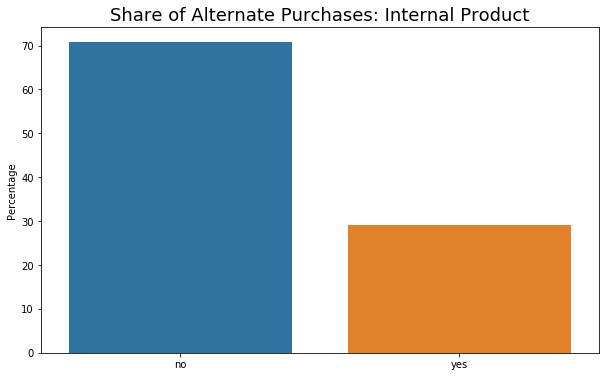

In [17]:
alt.show_internal_external(alt_purchase_merged.n1_internal)

no     65.482042
yes    34.517958
Name: n1_substitute, dtype: float64


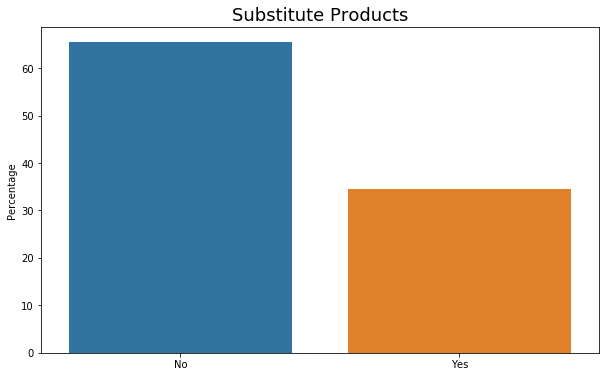

In [18]:
alt.show_substitutes(alt_purchase_merged.n1_substitute)

no     70.775047
yes    29.224953
Name: n1_internal, dtype: float64
************

no     74.820416
yes    25.179584
Name: n2_internal, dtype: float64
************

no     81.776938
yes    18.223062
Name: n3_internal, dtype: float64


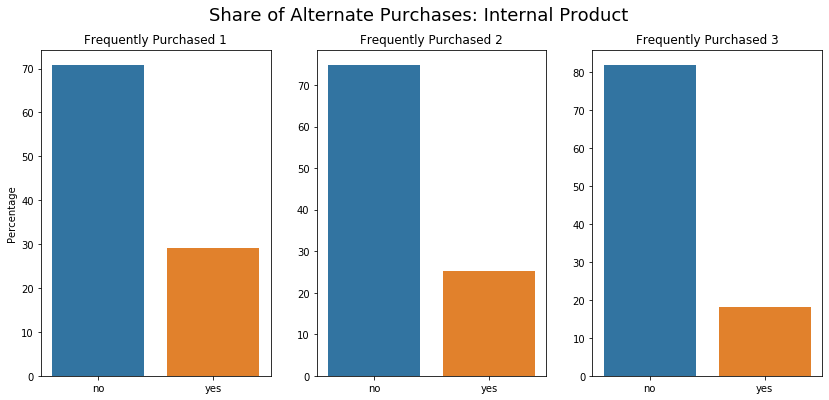

In [19]:
alt.show_internal_external_subplot(alt_purchase_merged.n1_internal, 
                                   alt_purchase_merged.n2_internal,
                                  alt_purchase_merged.n3_internal)

In [68]:
print(f'Average share of internal products: {round(np.mean([29.224953, 25.179584, 18.223062]), 2)} %')
print(f'Average share of external products: {round(np.mean([70.775047, 74.820416, 81.776938]), 2)} %')

Average share of internal products: 24.21 %
Average share of external products: 75.79 %


no     65.482042
yes    34.517958
Name: n1_substitute, dtype: float64
************

no     67.410208
yes    32.589792
Name: n2_substitute, dtype: float64
************

no     69.035917
yes    30.964083
Name: n3_substitute, dtype: float64


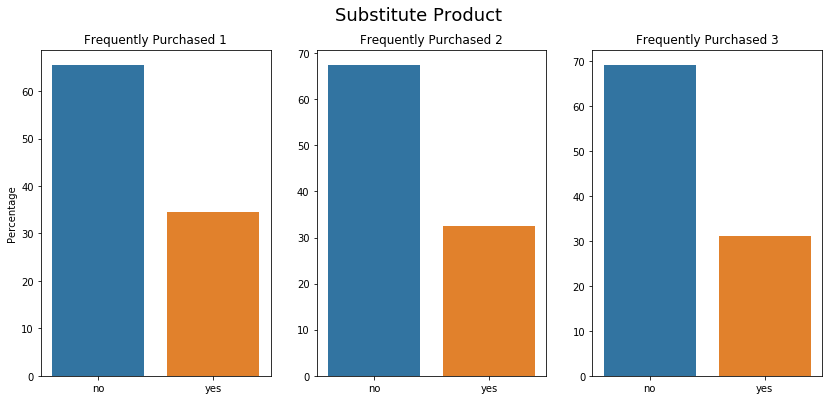

In [20]:
alt.show_substitues_subplot(alt_purchase_merged.n1_substitute,
                           alt_purchase_merged.n2_substitute,
                           alt_purchase_merged.n3_substitute)

In [69]:
print(f'Non-Substitutes average share: {round(np.mean([65.482042, 67.410208, 69.035917]), 2)} %')
print(f'Substitute average share: {round(np.mean([34.517958, 32.589792, 30.964083]), 2)} %')

Non-Substitutes average share: 67.31 %
Substitute average share: 32.69 %


### Alternate Purchase: Manual Toothbrush

In [27]:
sql_query = """
SELECT
  start_date,
  asin,
  product_title,
  n1_purchased_asin,
  n1_purchased_product_title,
  n1_purchased_percent,
  n2_purchased_asin,
  n2_purchased_product_title,
  n2_purchased_percent,
  n3_purchased_asin,
  n3_purchased_product_title,
  n3_purchased_percent
FROM 
  `cp-gaa-visualization-dev.arap.alternate_purchase_wly` 
WHERE 
  country = 'USA'
  AND asin IN ('B07C4CX794','B00NLNI6RW','B07G3KW4NT','B00H88K9EE','B00CX3NOSM','B015N68CYG','B07HCY9LKF','B00KYYHQNG','B01KKKFMPM','B00IIACG56',
  'B00DVO3YEQ','B00UB71TEI','B07HCRTHTR','B0178G8OK6','B006K3NBVQ','B00HXAIK3E','B07WQPLH9B','B0061KZC92','B076P3S2CP','B01H44XQZ0','B00TYV1DFC',
  'B00HA75SY4','B00JKQ66WG','B00YPBHDWI','B07ZPK39YK','B00JKQ68VU','B00UB6T4SM','B00DRDZG42','B07QKNQKML','B072BB5L9M','B00JWV60CU','B07P13M9LV',
  'B07KPN19XG','B001V9MNCC','B004Q85DWW','B004ZN7YCK','B01BNEX8F0','B073VHXY1K','B00O33B29S','B019MOHVHO','B017RCUNWI','B07C48TKFP','B07CHFYRS7',
  'B072P1R68T','B01KAQFT9A','B00F48DK6E','B0087RVNEU','B01IAEJPSU','B00HUGJUQW','B01IAEZKL6','B00WLW3GUG','B01AFRTOGI','B000052YA7','B000V5PC70',
  'B002HQCPU8','B002YXXZQM','B0014CV6S8','B001ET76YO','B00EZWSL3C','B00FKBEUE6','B00I7HPNHS','B00O2T6LBM','B012GO18VM','B019BVY05O','B01KAQ7XU8',
  'B00CC6XSRC','B00BJECKS6','B00E8M0WCC','B00HXAIGM4','B00K7VZ138','B06ZZFC7LJ','B004NH48FO','B071NHP4XG','B00RNHBXXG','B07HBJCKG4','B0789223GK',
  'B0795VHRY1','B00J5JNW7A','B07MSX8ZQW','B07P146LHV','B00A9YS9QO','B076BWB75Q','B0057S05J6','B075V3P3V5','B075V1RVSQ','B00ELI7SBG','B00EZWTONI',
  'B078LDFBLQ','B07LC4F3LS','B0124AFC0G','B075WYTKXC','B01LZ8CQ0N','B00LM8YR2G','B00HXAIN90','B0009W7MLE','B01452DJA6','B076BWBZTH','B000MAQW78',
  'B077ZZG9H6','B06X957CVD','B078LGMSXY','B079NP334L','B07W7WGZ21','B07CYSMX53','B002OTLN6A','B01AFRTQ3O','B01ELHXF36','B00DRDZBX8','B00D7IPR0U',
  'B00K150RF2','B07P14S7ZL','B01LZ8CXR8','B00FQR5KAM','B06W9NMPMT','B07GNDXQDL','B005TLYH1S','B0180TQHKO','B07VKBS8LT','B00GWPR2R6','B00B0L4UWC',
  'B000MANVO0','B00MDVR0K2','B0167JW02I','B01LWYF8M8','B01IAE0U48','B0009W7MKU','B00A0GQ0BW','B00AKX8HRA','B075WYW77V','B015UR2VUY','B01CWXFL7E',
  'B077Y4KTXY','B001OKEMNQ','B00TOT9H5M','B01HIEOSEY','B073X5ZZG2','B01N3AI5LD','B01LWYFB91','B00HC75THI','B002OTP1NG','B00EF5GE06','B00278S6LI',
  'B00HXAIN04','B07BDX1GH5','B07D78MS7V','B00ZYWXJNY','B01BWI493M','B005UNOTUO','B002MB2NWS','B07C438TXF','B003VWXYVG','B00VQTZLIU','B004QNY2FQ',
  'B00F1GLA7U','B071L47YP3','B01KAPTPFA','B0126XCQIM','B01A7WXIAO','B00NKSLL5W','B00J3SV42S','B01EXYHHK4','B01H42F77W','B01IC38NL4','B0752NJ66Z',
  'B07797G9VK','B07DJPR4TN','B07RGSKVQ5','B078H1T8D1','B018LM2Y7U','B07VHD1GNX','B01IAEJQTS','B00SCW6JQ2','B00I8B3PBY','B01LTHYW92','B00CO9NAMK',
  'B01A811FC2','B076BQ7XQP','B01KAQ4O0U','B07NVWC8K3','B00J5JHY5G','B019IC0GEK','B017KYGQE2','B010V82ZD0','B0081V75CQ','B01BDXAPWA','B00BH0SV4E',
  'B001OKM4AE','B076C49QT1','B00E9PPGTM','B000Q3KECA','B004NH48G8','B00HXAIJM6','B0024MY0U8','B0085DZAZE','B0167JW0PU','B008CQM4O4','B0823JVVKX',
  'B004NGZKKM','B00DAHHBSO','B00YPBH7LK','B00J5STRDY','B01613YHQC','B01D9XARH0','B07CWH822J','B00KOC32WM','B01M13SK88','B01LX9AI1A','B075NZTQYG',
  'B07MG4ZPBN','B01ELHXJVY','B017TGUY6M','B07DQRPHZ6','B0846GDMWD','B06WLMWPMT','B01IADWMUO','B01JKHP7UG','B000053UOC','B00YECQ8G0','B00KSKLKZ6',
  'B07NVWHZ32','B0793HF5WH','B0752NDC91','B005JLMD78','B07JBMF5BY','B07JCZPSJR','B07D7GVXG8','B07JBLVHKN','B00K0FQ5QI','B00UB6TEM8','B00J5SWPSS',
  'B01M32C4G4','B006ZET0S8','B00FSXEZVE','B00HXAIJH6','B00EV6PGV2','B004MDLZXM','B081DMGM5Q','B01K89EU26','B07NXDWX7S','B0000530QM','B00LIBBRAC',
  'B00UB6TC84','B01BN55EMY','B00IHYH9TG','B00N1ORV2M','B00UB6TIRY','B00L1D7W2E','B019QI9RBY','B071G361H9','B017B2GJIG','B008K2P13Q','B075JQJ6BV',
  'B07L4SV6TT','B00D19QDLM','B004WP5WSE','B0100RWVRC','B076BVX983','B078PTC262','B07K3G5M46','B00Y1CM8KS','B00B4Y3UFS','B00K150QP8','B01N9QXBHN',
  'B01A5ZEUVY','B01D9XBHD8','B01JN6KBJG','B01KX5V82U','B00UKC6V74','B014GA85OM','B004RSV5E6','B002JTYMSQ','B01LZ5XZ9D','B018MA3C6I','B00OYAC87K',
  'B01LZ8CQMT','B0070PX7E4','B07GG9HFYS','B07GX6KB9C','B005MQJ8OQ','B07S9GV83R','B00SCW6NR2','B00UB6TGTO','B075TZSR7K','B000RY7KFW','B01M2YRN8T',
  'B081HXT8MC','B00HC75J64','B00IAH1BDK','B01M3X8E0K','B003Q13R28','B005Y6QN74','B004NGX7Z2','B01NCUMW56','B0758HXCR4','B006ZBT0OA','B01IAE0XOA',
  'B01B4HXBGW','B071NHQW6G','B0795WDX1R','B01BEX8VCU','B00EECXC14','B008K2PDBQ','B001TH8Y60','B002771OXG','B071DPCBQG','B00ELI7U3C','B00UB6T2I4',
  'B00Z2PVTVC','B0752PF2QW','B00JP0MQWQ','B00CC6XSSQ','B07DJMZGYG','B079PDXTDX','B07TDHHH2Z','B0795SHYTM','B00SVJYV4S','B00ELI7SOS','B00UBJRN78',
  'B01CULNASU','B01DMQ21OQ','B00FGOQ9U0','B01KCJAZ9O','B003VDEIW4','B01LWMPCJ4','B01N26ZZUS','B00HDT7F7M','B00VRAEMEW','B017B2GJJA','B001G7QHC6',
  'B0752PF2RQ','B0767M4TNG','B01CQE47I8','B076C4GGFB','B07GFVLGFL','B003A4HSIA','B00WVLS2VK','B005HIJL64','B017A0DHF2','B01IAE0UPW','B01HI22DFC',
  'B00GB9MXOK','B01C5CJ9P2','B07D79HQTG','B00MUEEYTM','B00N1PH7FM','B003U5Y2HO','B01LTHMEP6','B0089NXU9I','B01891E908','B00ZYWXH4A','B07W7WFHTX',
  'B005OFT14C','B07NVX25D7','B00UB6T77A','B01NCW591G','B004NH2YO6','B001TH8Y6A','B078XXYG1N','B06W9NMN6R','B083CX8X3M','B00XNFUNYM','B07HDJFZ92',
  'B00LO33MBG','B00A0EZT2K','B00SCW6EVC','B00EZWSKLA','B076BWKZGZ','B001QVWLWW','B01BNEYQQU','B005372CSI','B0009W7MIW','B00EZWSKU6','B00NS1NC9O',
  'B00TV4HV6W','B07GGC9BX2','B01M74YBLE','B07DJLM7BD','B01613YHH6','B01JKFXUX4','B07BL5ZK4V','B0823JV25K','B082F1P8C2','B07GX6LKB9','B0190LUJXM',
  'B076BW3ZBZ','B01ICOR10M','B07768XP53','B01HI5VPW6','B017S0XXLW','B01NCW14Z0','B0721YBVMY','B07S6CJGQ5','B07YQL2C49','B01BWI48W4','B01KX5SD0A',
  'B07CYTLT37','B07GNG8D6D','B07K3LZ7WH','B010OUZNHA','B075WZ66RQ','B07F96SBZW','B07KPYRRJM','B07R81DBWH')
"""

In [28]:
qry = QueryTable(sql_query)
alt_purchase = qry.query_table()

Downloading: 100%|██████████| 13662/13662 [00:01<00:00, 7707.89rows/s]


In [29]:
prod_catalog = get_prod_catalog(alt_purchase)
alt_purchase_toothbrush = get_subcategory(alt_purchase, keyword='Toothbrush')

There are 221 unique products


In [30]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n1_purchased_product_title', brand='Colgate', keyword='Toothbrush')
alt_purchase_1 = alt.flag_alt_products()

In [35]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n2_purchased_product_title', brand='Colgate', keyword='Toothbrush')
alt_purchase_2 = alt.flag_alt_products()

In [36]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n3_purchased_product_title', brand='Colgate', keyword='Toothbrush')
alt_purchase_3 = alt.flag_alt_products()

In [37]:
alt_purchase_merged = alt.merge_table(alt_purchase_1, alt_purchase_2, alt_purchase_3)
alt_purchase_merged.head(3)

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
0,2018-06-24,B001OKM4AE,Colgate Max Fresh Full Head Adult Toothbrush M...,Colgate 360 Adult Toothbrush Medium (4 Count),yes,no,Colgate Max White Whitening Toothbrush Soft - ...,yes,no,Colgate Max Fresh Toothbrush with Tongue Clean...,no,no
1,2018-06-24,B076BWBZTH,Colgate Plus Bi-Level Soft Full Head Toothbrush,Pop-Tarts BreakfastToaster Pastries Frosted St...,no,no,Peak Edition Nature Valley Granola Cups Peanut...,no,no,Listerine Cool Heat Pocketpaks Breath Strips f...,no,no
2,2018-06-24,B076BVX983,Colgate 360 Total Advanced Full Head Toothbrus...,Colgate 360 Toothbrush with Tongue and Cheek C...,yes,no,American Crew Forming Cream 3 ounce,no,no,Nature Made Maximum Strength Melatonin 5 mg Ta...,no,no


no     62.881186
yes    37.118814
Name: n1_internal, dtype: float64
************

no     74.476955
yes    25.523045
Name: n2_internal, dtype: float64
************

no     81.826604
yes    18.173396
Name: n3_internal, dtype: float64


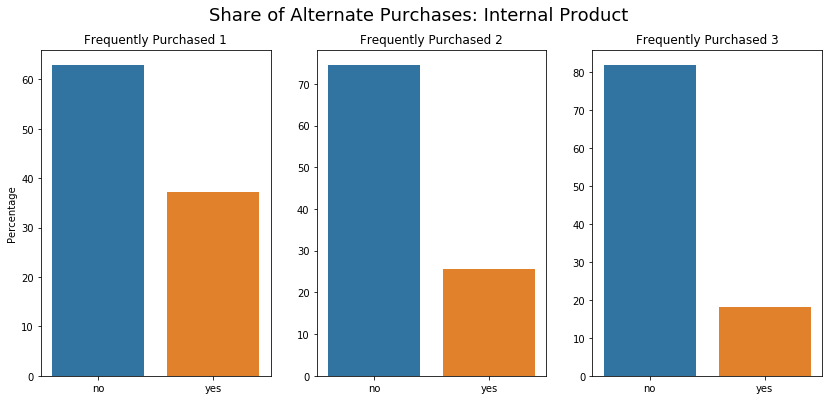

In [38]:
alt.show_internal_external_subplot(alt_purchase_merged.n1_internal, 
                                   alt_purchase_merged.n2_internal,
                                  alt_purchase_merged.n3_internal)

In [66]:
print(f'Average share of internal products: {round(np.mean([18.173396, 25.523045, 37.118814]), 2)} %')
print(f'Average share of external products: {round(np.mean([62.881186, 74.476955, 81.826604]), 2)} %')

Average share of internal products: 26.94 %
Average share of external products: 73.06 %


no     88.805682
yes    11.194318
Name: n1_substitute, dtype: float64
************

no     88.272987
yes    11.727013
Name: n2_substitute, dtype: float64
************

no     88.157184
yes    11.842816
Name: n3_substitute, dtype: float64


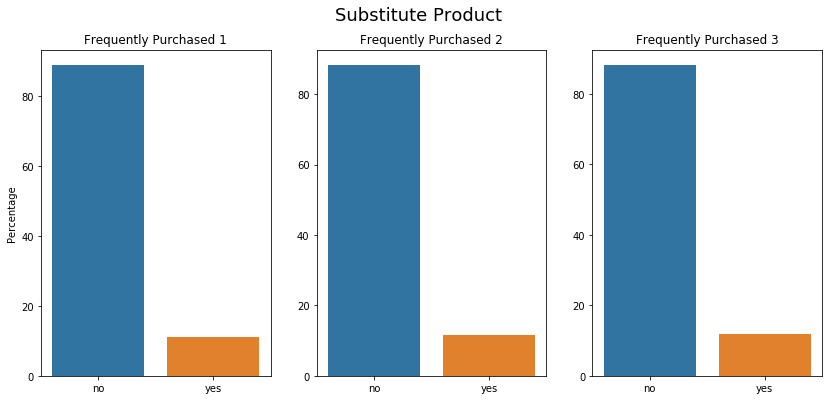

In [39]:
alt.show_substitues_subplot(alt_purchase_merged.n1_substitute,
                           alt_purchase_merged.n2_substitute,
                           alt_purchase_merged.n3_substitute)

In [70]:
print(f'Non-Substitutes average share: {round(np.mean([88.805682, 88.272987, 88.157184]), 2)} %')
print(f'Substitute average share: {round(np.mean([11.842816, 11.727013, 11.194318]), 2)} %')

Non-Substitutes average share: 88.41 %
Substitute average share: 11.59 %


In [42]:
alt_purchase_comp_1 = alt.get_competitor_product(alt_purchase_merged)

In [54]:
alt_purchase_comp_1[alt_purchase_comp_1.n1_substitute=='yes'].head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
128,2018-10-14,B07CHFYRS7,Colgate Kids Extra Soft Toothbrush Value Pack ...,Oral-B and Crest Kids Pack featuring Disney's ...,no,yes,Lenox Seaview Swirl Bottle Vase,no,no,,no,no
2582,2018-10-14,B000MANVO0,Colgate Toothbrush Dora The Explorer Extra Sof...,Oral-B and Crest Kids Pack Featuring Disney's ...,no,yes,Oral-B Glide Pro-Health Comfort Plus Dental Fl...,no,no,Life Extension Bone Restore with Vitamin K2 12...,no,no
2841,2018-10-07,B000V5PC70,Colgate SpongeBob Extra Soft Kids Toothbrush (...,Oral-B and Crest Kids Holiday Pack Featuring D...,no,yes,Babyganics Fluoride Free Toothpaste Strawberry...,no,no,Glamorise Women's Plus-Size Full Figure No-Bou...,no,no
5392,2018-04-29,B00GWPR2R6,Colgate Kids Power Toothbrush Teenage Mutant N...,Oral-B and Crest Kid's Pack featuring Disney's...,no,yes,Colgate Kids Interactive Talking Toothbrush Te...,yes,no,Colgate Kids Interactive Talking Toothbrush Mi...,no,no
5393,2018-04-29,B00GWPR2R6,Colgate Kids Power Toothbrush Teenage Mutant N...,Oral-B and Crest Kid's Pack featuring Disney's...,no,yes,Colgate Kids Interactive Talking Toothbrush Te...,yes,no,Colgate Kids Interactive Talking Toothbrush Mi...,no,no


In [47]:
alt_purchase_comp_1.n1_purchased_product_title[128]

"Oral-B and Crest Kids Pack featuring Disney's Frozen Kids Fluoride Anticavity Toothpaste and Battery Powered Toothbrush (Brush Design May Vary)"

In [48]:
alt_purchase_comp_1.product_title[128]

'Colgate Kids Extra Soft Toothbrush Value Pack Ocean Explorer 4 Count (Pack of 18)'